In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import *
from sklearn.preprocessing import StandardScaler

In [10]:
# Carga de datos.
datos = datasets.load_boston()
datos.data.shape

(506, 13)

In [3]:
# Algoritmos de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k)

In [4]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [5]:
# Preprocesamiento previo de los datos.
est = StandardScaler()
datos_preprocesados = est.fit_transform(datos.data)

In [8]:
# Validación y obtención de las predicciones del modelo.
seed = 1
y_pred = cross_val_predict(reg, datos_preprocesados, datos.target,
           cv = KFold(n_splits=10, random_state=seed, shuffle=True))

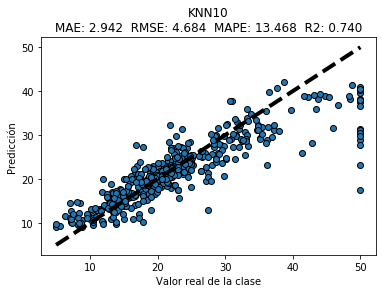

In [9]:
# Evaluación y presentación de resultados.
eval = evaluacion(datos.target, y_pred, metricas)
grafica_real_vs_pred(datos.target, y_pred, eval, "KNN"+str(k))